In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/aadarshvelu/heart-failure-prediction-clinical-records/heart_failure_clinical_records.csv


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aadarshvelu/heart-failure-prediction-clinical-records")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/datasets/aadarshvelu/heart-failure-prediction-clinical-records


In [4]:
import pandas as pd
data = pd.read_csv("/kaggle/input/datasets/aadarshvelu/heart-failure-prediction-clinical-records/heart_failure_clinical_records.csv")
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
5,70.0,0,232,1,30,0,302000.00,1.2,132,1,0,210,0
6,63.0,1,122,1,60,0,172000.00,1.2,145,0,0,147,0
7,70.0,1,171,0,50,1,358000.00,0.9,141,0,0,196,0
8,50.0,0,482,1,30,0,300000.00,0.9,132,1,0,109,0
9,53.0,1,446,0,45,1,274000.00,1.0,133,1,0,215,0


**Exploratory Data Analysis**

In [5]:
data.shape

(5000, 13)

In [5]:
data.isnull().sum()
(data.isnull().sum() / len(data)) * 100

# Check for null values. Calculate the percentage of missing values per column

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

In [6]:
data.describe()

#Print descriptive statistics of data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [7]:
data.head()
data['DEATH_EVENT'].value_counts(normalize=True)*100

# Check class distribution of the target variable (DEATH_EVENT). This helps detect class imbalance.

DEATH_EVENT
0    68.64
1    31.36
Name: proportion, dtype: float64

In [14]:

# Percentage duplicates
print("Proportion of duplicate data", data.duplicated().mean() * 100,"%")

# This gives the proportion of duplicates in the dataset.


Proportion of duplicate data 73.6 %


In [13]:
# Total number of rows in the dataset
total_rows = data.shape[0]

# Number of unique rows after removing duplicates
unique_rows = data.drop_duplicates().shape[0]

print("Total rows:", total_rows)
print("Unique rows:", unique_rows)
print("Duplicate rows:", total_rows - unique_rows)

Total rows: 5000
Unique rows: 1320
Duplicate rows: 3680


In [16]:
data = data.drop_duplicates()

# Remove completely duplicated rows from the dataset.


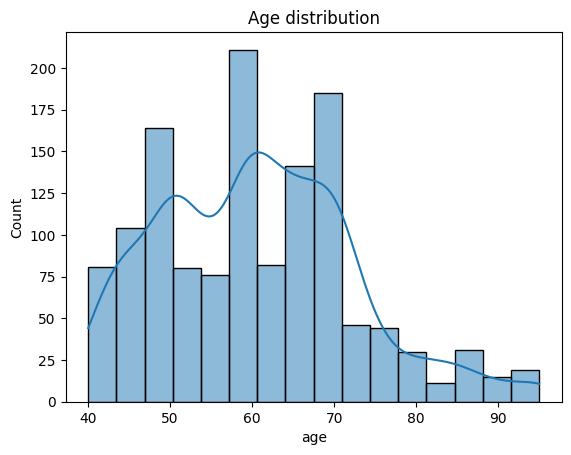

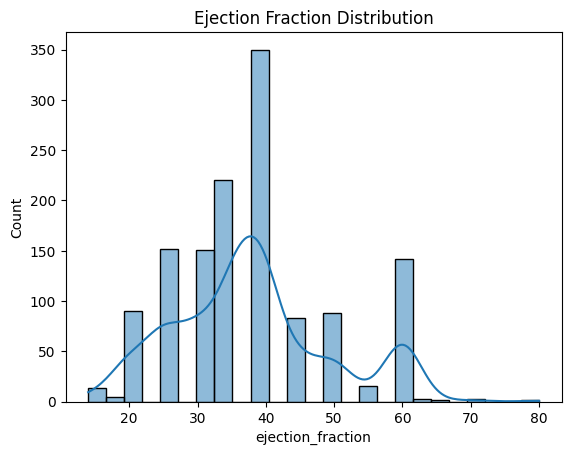

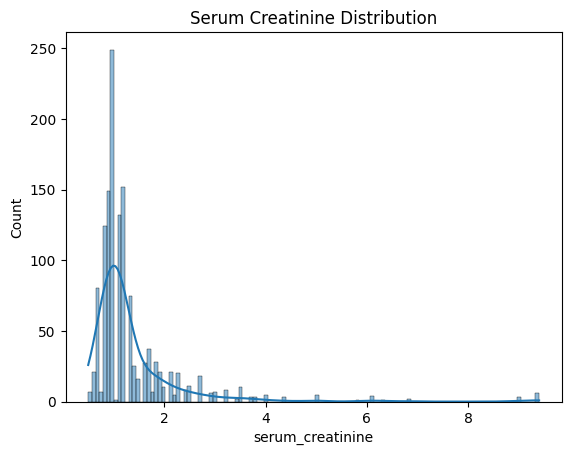

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(data['age'], kde=True)
plt.title('Age distribution')
plt.show()

# Ejection fraction is clinically important and may show threshold effects.
plt.figure()
sns.histplot(data['ejection_fraction'], kde=True)
plt.title("Ejection Fraction Distribution")
plt.show()

# This variable often shows right-skew due to extreme kidney impairment cases.
plt.figure()
sns.histplot(data['serum_creatinine'], kde=True)
plt.title("Serum Creatinine Distribution")
plt.show()

In [19]:
corr = data.corr()
# Compute the correlation matrix for all numerical features.


corr['DEATH_EVENT'].sort_values(ascending=False)
# Sort correlations with respect to the target variable (DEATH_EVENT).

DEATH_EVENT                 1.000000
serum_creatinine            0.290229
age                         0.224602
high_blood_pressure         0.113721
anaemia                     0.063510
creatinine_phosphokinase    0.055221
sex                         0.044045
smoking                     0.006774
diabetes                   -0.001485
platelets                  -0.044523
serum_sodium               -0.250990
ejection_fraction          -0.271767
time                       -0.507374
Name: DEATH_EVENT, dtype: float64

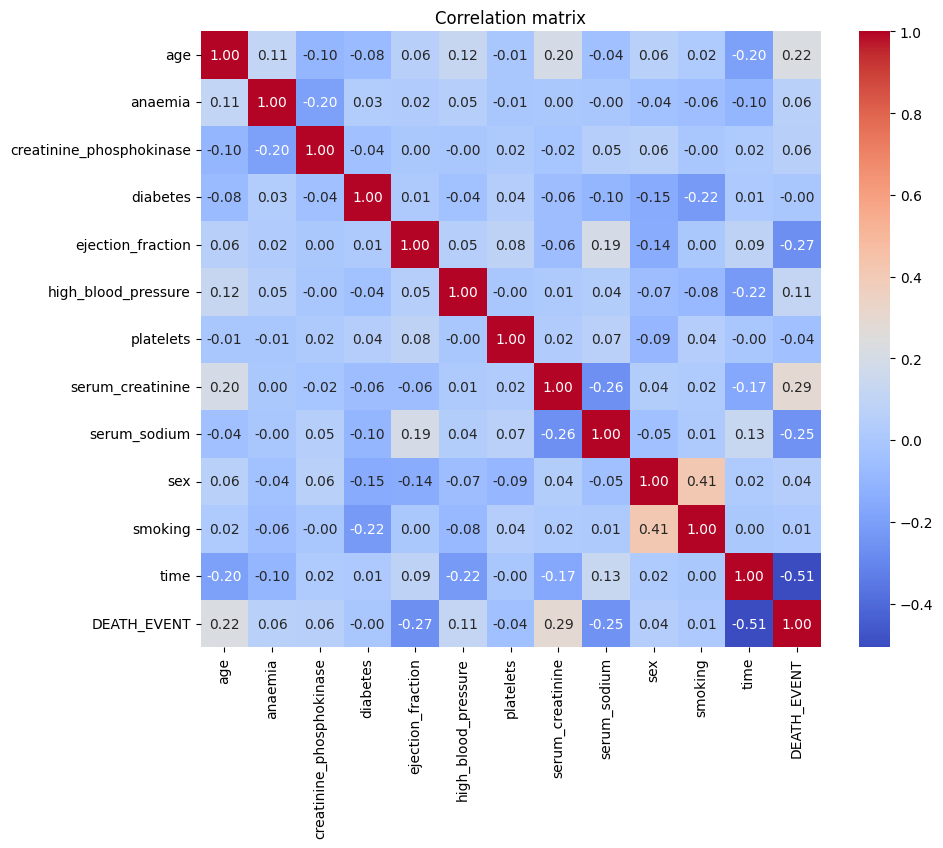

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='0.2f')
plt.title('Correlation matrix')
plt.show()

# Plot correlation heatmap
# annot=True → display correlation values inside each cell
# cmap='coolwarm' → diverging color map (blue = negative, red = positive)
# fmt='.2f' → format annotation values to 2 decimal places

**TRAIN A LOGISTIC REGRESSION MODEL**

Train loss = 0.4929368276178755
Test loss = 0.4544228238880126
Confusion matrix
[[170  15]
 [ 39  40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       185
           1       0.73      0.51      0.60        79

    accuracy                           0.80       264
   macro avg       0.77      0.71      0.73       264
weighted avg       0.79      0.80      0.78       264


ROC-AUC Score:
0.8565172767704413


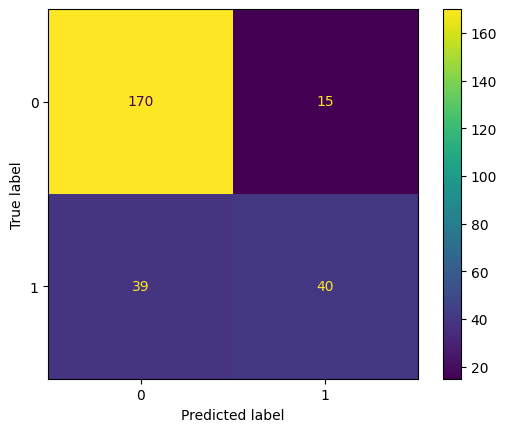

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, log_loss, ConfusionMatrixDisplay

x = data.drop(columns=['DEATH_EVENT', 'time'])
y = data['DEATH_EVENT']


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)
x_train.shape
# stratify=y ensures class balance is preserved
# across train and test sets (important for imbalanced data).

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# StandardScaler standardizes features to mean=0, std=1.
# Fit only on training data to avoid data leakage.

model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_train)

# Evaluate Training Performance (Log Loss)
train_prob = model.predict_proba(x_train_scaled)[:,1]
train_loss = log_loss(y_train, train_prob)
print(f'Train loss = {train_loss}')

# Evaluate Test Performance
y_pred = model.predict(x_test_scaled)
y_prob = model.predict_proba(x_test_scaled)[:,1]
test_loss = log_loss(y_test, y_prob)
print(f'Test loss = {test_loss}')

print("Confusion matrix")
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_prob))

**TRAIN A RANDOM FOREST CLASSIFIER**

Train Log Loss: 0.06604635690021379
Test Log Loss: 0.19733987429904784
Confusion matrix
[[181   4]
 [ 12  67]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       185
           1       0.94      0.85      0.89        79

    accuracy                           0.94       264
   macro avg       0.94      0.91      0.93       264
weighted avg       0.94      0.94      0.94       264


ROC-AUC Score:
0.9852890865549093


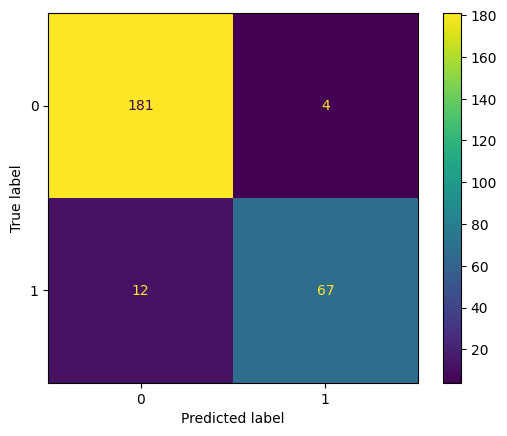

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=80
)
# n_estimators=200 -> number of trees

rf.fit(x_train, y_train)
train_probr = rf.predict_proba(x_train)[:,1]
train_lossr = log_loss(y_train, train_probr)
print("Train Log Loss:", train_lossr)


y_pred_rf = rf.predict(x_test)
y_prob_rf = rf.predict_proba(x_test)[:,1]
test_loss = log_loss(y_test, y_prob_rf)
print("Test Log Loss:", test_loss)

print("Confusion matrix")
cm2 = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
print(cm2)
disp2 = ConfusionMatrixDisplay(cm2, display_labels=rf.classes_)
disp2.plot()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_prob_rf))



**GRADIENT BOOSTING**


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=80
)
# n_estimators -> number of boosting stages
# learning_rate -> shrinkage applied to each tree contribution
# max_depth -> depth of individual regression trees

gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)
train_prob_gb = gb.predict_proba(x_train)[:,1]
train_loss_gb = log_loss(y_train, train_prob_gb)
print("Train Log Loss:", train_loss_gb)

test_prob_gb = gb.predict_proba(x_test)[:,1]
test_loss_gb = log_loss(y_test, test_prob_gb)
print("Test Log Loss:", test_loss_gb)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, test_prob_gb))


Train Log Loss: 0.13382255483599786
Test Log Loss: 0.19162139698793024
Confusion Matrix:
[[183   2]
 [ 13  66]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       185
           1       0.97      0.84      0.90        79

    accuracy                           0.94       264
   macro avg       0.95      0.91      0.93       264
weighted avg       0.94      0.94      0.94       264


ROC-AUC Score:
0.9826890181320561


**Extreme Gradient Boosting Classifier**

In [30]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=80,
    eval_metric='logloss'
)
# n_estimators -> number of boosting rounds
# learning_rate -> step size shrinkage
# max_depth -> maximum depth of each tree
# subsample -> fraction of samples used per tree (reduces overfitting)
# colsample_bytree -> fraction of features used per tree
# eval_metric='logloss' -> optimization objective

# New Prediction=Old Prediction+η×Tree Output

xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)
y_prob_xgb = xgb.predict_proba(x_test)[:,1]
print("Train log loss = " , log_loss(y_train, xgb.predict_proba(x_train)[:,1]))
print('Test log loss = ', log_loss(y_test, y_prob_xgb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_prob_xgb))

Train log loss =  0.12189233780739754
Test log loss =  0.20118169452953286

Confusion Matrix:
[[180   5]
 [ 15  64]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       185
           1       0.93      0.81      0.86        79

    accuracy                           0.92       264
   macro avg       0.93      0.89      0.91       264
weighted avg       0.92      0.92      0.92       264


ROC-AUC Score:
0.9785152240848444
